# <span id="toc">  Esercitazione 5 - Algoritmo di Metropolis</span>

[  Funzione d'onda - Atomo di idrogeno ](#ex-5.0)

[  5.1 - Ground State ](#ex-5.1)

[  5.2 - Primo stato eccitato ](#ex-5.1)



## <span id="ex-5.0">  Funzione d'onda - Atomo di idrogeno </span>[^](#toc)

La [**funzione d'onda**](https://en.wikipedia.org/wiki/Wave_function) $\Psi$ di uno stato quantistico rappresenta un'ampiezza di probabilità, e da essa possono essere dedotti i valori di aspettazione delle osservabili del sistema.

Per questa esercitazione consideriamo una particella *spinless*, non relativistica, in 3D, descritta esaustivamente dalla funzione d'onda $\Psi(\vec{r},t)$, con $\vec{r},t$ posizione e tempo. In questo caso $|\Psi(\vec{r},t)|^2$ è la densità di probabilità che la particella sia in $\vec{r}$ al tempo $t$, che usiamo per sondare lo spazio con l'algoritmo di Metropolis.


Le funzioni d'onda degli autostati dell'atomo di idrogeno (note analiticamente) si esprimono bene in coordinate sferiche tramite armoniche sferiche $Y_l^m(\theta,\phi)$ e polinomi di Laguerre $L_{n-l-1}^{2l+1}(\cdot)$:
$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529\times 10^{-9}$ è il raggio di Bohr, $n=1,2,...$ è il numero quantico principale, $l=0,1, ..., n-1$ è quello secondario, $m=-l, -l+1, ..., l-1, l$ quello magnetico.

In questa esercitazione vado a studiare in particolare il Ground State (GS) e il primo Stato Eccitato (ES), con rispettive funzioni d'onda:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}
\qquad \qquad
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

e rispettivi valori di aspettazione per la distanza dell'elettrone dal centro:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\qquad \qquad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

In particolare andrò a **misurare la distanza media dal centro di una particella che si muove attorno al nucleo**, confrontando i valori ottenuti con le previsioni teoriche di $\left\langle r \right\rangle$ per entrambi gli stati.



### Algoritmo di Metropolis

Per sondare le possibili posizioni di un elettrone nello spazio circostante il nucleo, usiamo l'algoritmo di Metropolis. In generale l'algoritmo di metropolis è un algoritmo *rejection-realted* che permette di **campionare qualsiasi distribuzione di probabilità**. 
In questo problema esso funziona nel seguente modo:
- prende la posizione attuale $y$
- propone un passo casuale nello spazio 3D (lungo al massimo $L$), che porta in posizione $x$
- accetta la mossa proposta con probabilità $A(x|y) = \min \left[1, \frac{p(x)}{p(y)}\right]$, dove $p(\cdot)=|\Psi(\cdot,t)|^2$, quindi accetta il $100\%$ delle mosse in direzione di posizioni più probabili, mentre rigetta una parte delle mosse proposte in direzione di posizioni meno probabili

La proposta di passo casuale è stata fatta secondo due distribuzioni:
- uniforme, con passo $L$
- gaussiana, con $\sigma = L$

### Equilibrazione

Prima di cominciare la simulazione vera e propria, è necessario equilibrare il sistema, per evitare di avere la particella da principio in posizioni "improbabili" che ne alterano la stima della distanza media dal centro.

Per farlo ho impostato il file `input.dat` coi seguenti parametri:
```
400  blocchi
1    step per blocco
1.5  larghezza passo
10   pos iniz GS
20   pos iniz ES
1/0  gauss/unif
```

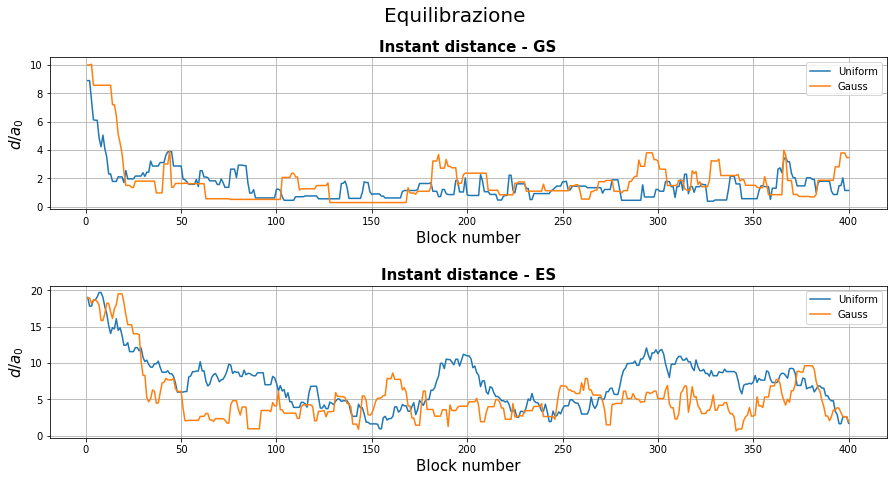

In [79]:
### Equilibrazione

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 400
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize =(15,7))
plt.suptitle("Equilibrazione", fontsize=20)

plt.subplot(2,1,1)
dist = np.loadtxt("ex5/eq/GS/dist_unif.out", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Uniform")
dist = np.loadtxt("ex5/eq/GS/dist_gauss.out", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel('$d/a_0$', fontsize=15)
plt.xlabel('Block number', fontsize=15)
plt.grid(True)
plt.title('Instant distance - GS', fontsize=15, fontweight = "bold")
plt.legend()


plt.subplot(2,1,2)
dist = np.loadtxt("ex5/eq/ES/dist_unif.out", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Uniform")
dist = np.loadtxt("ex5/eq/ES/dist_gauss.out", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel('$d/a_0$', fontsize=15)
plt.xlabel('Block number', fontsize=15)
plt.grid(True)
plt.title('Instant distance - ES', fontsize=15, fontweight = "bold")
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()



Avendo osservato che il sistema si porta all'equilibrio in meno di 400 passi, ho ritenuto efficace per l'equilibrazione aggiungere all'inizio di ogni simulazione un ciclo di 1000 passi (per stare largo!) in cui il sistema viene lasciato evolvere prima di inizare la simulazione vera e propria.

### Partenza da lontano

Prima di implementare l'equilibrazione, per visualizzare la traiettoria di una particella che parte molto lontano dalla zona di alta densità di probabilità, ho provato una simulazine coi seguenti parametri:
```
10000 blocchi
1     step per blocco
1.5   larghezza passo
30    pos iniz GS
50    pos iniz ES
0     unif
```

In questo modo ho potuto osservare chiaramente la particella "dirigersi" verso il suo orbitale.

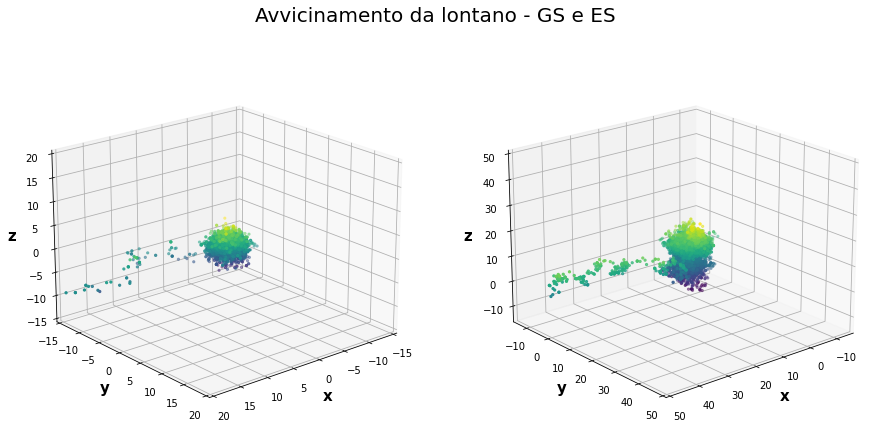

In [96]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15,7))
plt.suptitle("Avvicinamento da lontano - GS e ES", fontsize = 20)
state = ["GS", "ES"]
limsup = [20, 50]

for i in range(0,2):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    X,Y,Z = np.loadtxt("ex5/path/"+state[i]+"/pos_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')
    ax.scatter(X, Y, Z, c=Z, marker='.')
    ax.set_xlabel('x', fontweight = "bold", fontsize = 15)
    ax.set_ylabel('y', fontweight = "bold", fontsize = 15)
    ax.set_zlabel('z', fontweight = "bold", fontsize = 15)
    ax.view_init(20, 50)
    ax.set_xbound(-15,limsup[i])
    ax.set_ybound(-15,limsup[i])
    ax.set_zbound(-15,limsup[i])

plt.show()


### Lunghezza dei blocchi

Vedremo meglio nell'[esercitazione 7](#https://github.com/martinozanetti/LSN-Martino-Zanetti/blob/master/07-ok/my-07.ipynb) il concetto di autocorrelazione necessario a stimare con cura la lunghezza dei blocchi. Per il momento ci limitiamo a osservare qualitativamente dai grafici dell'equilibrazione che entro i 400 passi ogni correlazione tra la posizione di partenza e quella i-esima è scomparsa. Siamo allora tranquilli che usando $10^4$ passi per blocco, le medie di blocchi adiacenti non risultano tra loro correlate.

## <span id="ex-5.1">  Esercizio 5.1 - Ground State </span>[^](#toc)

Come anticipato, uso l'algoritmo di Metropolis per campionare la posizione di una particella in coordinate cartesiane, estraendo passi con probabilità di transizione $T(\vec{x}|\vec{y})$:
- uniforme 
- gaussiana

Uso le posizioni campionate per stimare la distanza media dal nucleo, sia per il Ground State $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ che per il primo Excited State $\left\langle r \right\rangle_{\Psi_{2,1,0}}$.


Come al solito, utilizzo il data-blocking opportunamente dimensionato ($100$ blocchi da $10^4$ step ciascuno) e mostro la stima della media progressiva con relativa incertezza statistica all'aumentare dei blocchi.


Per la simulazione:
- uso come unità di lunghezza il Raggio di Bohr, $a_0$, in maniera da avere risultati di ordine $\sim1$
- scelgo uno step di lunghezza $L$ per le probabilità di transizione tale da ottenere circa $50\%$ di *acceptance rate* (in entrambi i casi `L=1.5`, con estrazioni rispettivamente `Random(inf = -L, sup = L)` e `Gauss(mean = 0, sigma = L)`). Con questo valore ho a.r. tra $0.25$ e $0.72$ circa.
- dall'osservazione dei grafici per l'equilibrazione scelgo di partire da $(x,y,z)=(2,0,0)$ per il GS e da $(x,y,z)=(5,0,0)$ per l'ES. In verità, siccome eseguo l'equilibrazione prima della simulazione, questa scelta è poco rilevante, avendo visto che in circa $50$ passi a partire da una distanza molto maggiore comunque l'elettrone raggiunge la zona di alta densità di probabilità.

Risultato finale Unif: 
1.50135
Incertezza statistica : 
0.00378366

Risultato finale Gauss: 
1.49999
Incertezza statistica : 
0.00464623


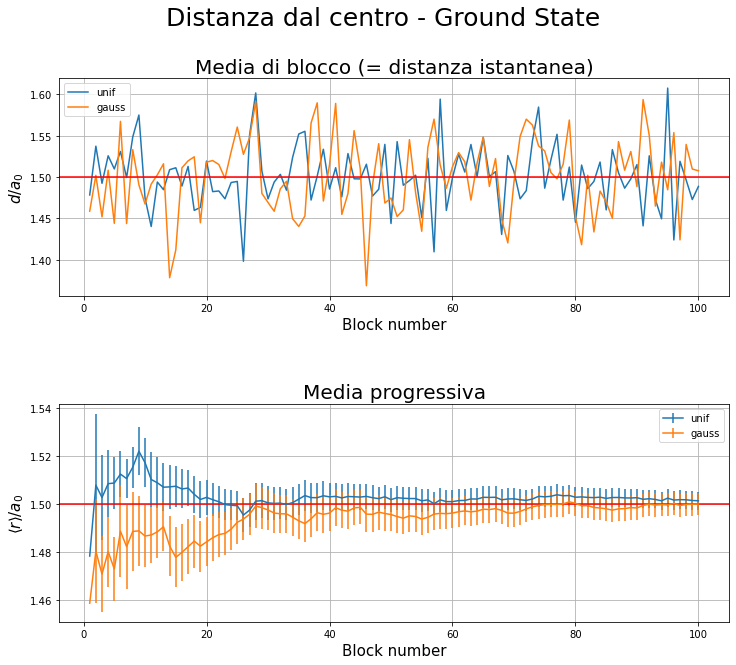

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,10))
plt.suptitle("Distanza dal centro - Ground State", fontsize = 25)

#---------------------------

plt.subplot(2,1,1)

pos, ave, err = np.loadtxt("ex5/GS/dist_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "unif")
pos, ave, err = np.loadtxt("ex5/GS/dist_gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "gauss")
plt.ylabel('$d/a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Media di blocco (= distanza istantanea)',  fontsize = 20)
plt.legend()

#---------------------------

plt.subplot(2,1,2)

pos, ave, err = np.loadtxt("ex5/GS/dist_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "unif")
print('Risultato finale Unif: ')
print(ave[-1])
print('Incertezza statistica : ')
print(err[-1])

pos, ave, err = np.loadtxt("ex5/GS/dist_gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "gauss")
print('\nRisultato finale Gauss: ')
print(ave[-1])
print('Incertezza statistica : ')
print(err[-1])

plt.ylabel(r'$\langle r\rangle /a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Media progressiva',  fontsize = 20)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()



### Osservazioni

Le due probabilità di transizione forniscono risultati analoghi, perfettamente compatibili sia tra loro che con la previsione teorica. Potevo aspettarmi comunque che il passo gaussiano permettesse di sondare lo spazio in maniera più ergodica, data la presenza delle code non nulle.

### Grafici ulteriori

Riporto per completezza il grafico delle **posizioni** campionate durante la simulazione e l'**istogramma** dei campionamenti lungo la coordinata verticale (in questo caso l'orbitale è simmetrico, ma nel caso dell'ES no). Quest'ultimo mostra il concetto un po' inusuale di *profilo di densità di probabilità integrata sul piano $XY$ alla quota $Z$*, e perciò dà un'idea della forma dell'orbitale lungo la verticale.

/tmp/ipykernel_49494/2177235663.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


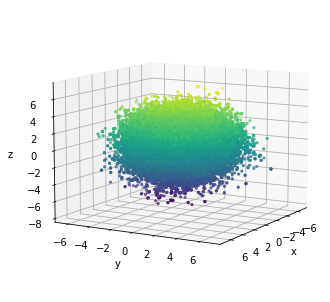

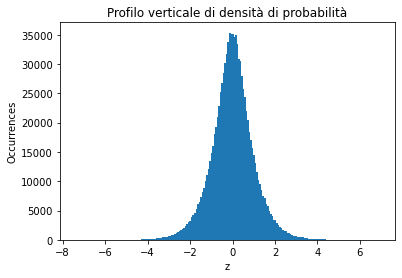

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z = np.loadtxt("ex5/GS/pos_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

#--------------------------------------

# cross section on (x,y)=(0,0) axis

fig = plt.figure()
plt.hist(Z,200)
plt.xlabel("z")
plt.ylabel("Occurrences")
plt.title("Profilo verticale di densità di probabilità")

plt.show()

# nota: con 1e6 punti impiega circa 30 secondi

## <span id="ex-5.2">  Esercizio 5.2 - Excited State </span>[^](#toc)


Risultato finale Unif: 
4.97413
Incertezza statistica : 
0.0151124

Risultato finale Unif: 
4.99322
Incertezza statistica : 
0.0116193


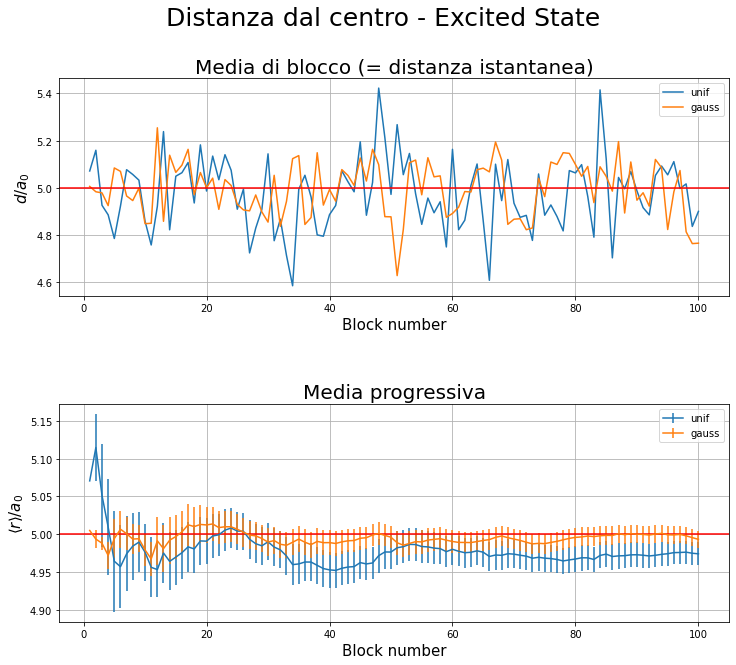

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,10))
plt.suptitle("Distanza dal centro - Excited State", fontsize = 25)

#---------------------------

plt.subplot(2,1,1)

pos, ave, err = np.loadtxt("ex5/ES/dist_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "unif")
pos, ave, err = np.loadtxt("ex5/ES/dist_gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "gauss")
plt.ylabel('$d/a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Media di blocco (= distanza istantanea)',  fontsize = 20)
plt.legend()

#---------------------------

plt.subplot(2,1,2)

pos, ave, err = np.loadtxt("ex5/ES/dist_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "unif")
print('Risultato finale Unif: ')
print(ave[-1])
print('Incertezza statistica : ')
print(err[-1])

pos, ave, err = np.loadtxt("ex5/ES/dist_gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "gauss")
print('\nRisultato finale Unif: ')
print(ave[-1])
print('Incertezza statistica : ')
print(err[-1])

plt.ylabel(r'$\langle r\rangle /a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Media progressiva',  fontsize = 20)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

### Osservazioni

Anche in questo caso le due probabilità di transizione forniscono risultati analoghi, compatibili sia tra loro e con la previsione teorica, anche se non altrettanto buoni che nel caso del GS. Osservo comunque l'andamento nel caso di passo gaussiano è più regolare.

### Grafici ulteriori

Riporto gli stessi grafici di sopra, per lo stato ES.

/tmp/ipykernel_49494/1531266324.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


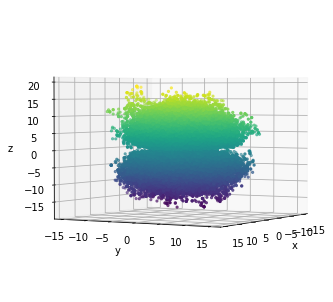

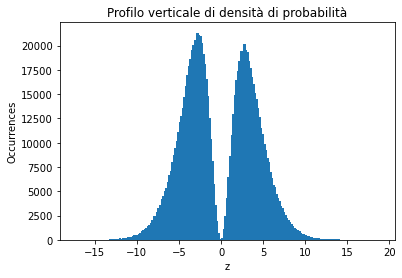

In [115]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z = np.loadtxt("ex5/ES/pos_unif.out", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(2, 30)

plt.show()

#--------------------------------------

# cross section on (x,y)=(0,0) axis

fig = plt.figure()
plt.hist(Z,200)
plt.xlabel("z")
plt.ylabel("Occurrences")
plt.title("Profilo verticale di densità di probabilità")

plt.show()

# nota: con 1e6 punti impiega circa 30 secondi